# Q4. Gaussian Discriminant Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

(a) GDA with same Covariance

In [2]:
def std_normalize(X: np.ndarray):
    X_mu = X.mean(axis=0)
    X_std = X.std(axis=0)
    return (X-X_mu)/X_std

def sigmoid(X: np.ndarray):
    return 1/(1+np.exp(-X))

def phi_func(Y: np.ndarray):
    return np.count_nonzero(Y!=0)/len(Y)

def mean(X: np.ndarray, Y: np.ndarray):
    X1 = X[Y==0]
    X2 = X[Y==1]
    return np.array([X1.mean(axis=0),X2.mean(axis=0)])

In [3]:
def sigmaParticiple(X: np.ndarray, Y: np.ndarray, type=-1):
    X1 = X[Y==0]
    X2 = X[Y==1]
    m1, m2 = mean(X,Y)

    if type == 0:
        return ((X1-m1).T@(X1-m1))/len(X1)
    elif type == 1:
        return ((X2-m2).T@(X2-m2))/len(X2)
    else:
        return ((X1-m1).T@(X1-m1) + (X2-m2).T@(X2-m2))/len(Y)

In [4]:
X_train = np.loadtxt("../data/q4/q4x.dat")
Y_train = np.loadtxt("../data/q4/q4y.dat",dtype=object)     # couldn't convert Alaska to float?

In [5]:
X = std_normalize(X_train)
Y = np.where(Y_train == "Canada",1,0)

In [ ]:
# Calculate the inverse of the covariance matrix
n = len(X)
n0 = len(X[Y==0])
n1 = len(X[Y==1])

# Define discriminant functions
def discriminant_function(X, mu, sigma_common, prior):
    return np.log(prior) - 0.5 * (X - mu)@(np.linalg.inv(sigma_common))@((X - mu).T) - 0.5 * np.log(np.linalg.det(sigma_common))

# Classify a sample
def linear_boundary(x0_space, x1_space):
    mesh_space = np.meshgrid(x0_space, x1_space)
    sample_x = np.stack()
    x = np.column_stack([np.ones(len(x0_space))])
    g0 = discriminant_function(x, mu0, sigma_common, n0/n)
    g1 = discriminant_function(x, mu1, sigma_common, n1/n)
    return 0 if g0 > g1 else 1

In [6]:
mu0, mu1 = mean(X,Y)
phi = phi_func(Y)

print("Mean(mu0) of 'Alaska' labels = ", mu0)
print("Mean(mu1) of 'Canada' labels = ", mu1)
print("phi = ", phi)

Mean(mu0) of 'Alaska' labels =  [-0.75529433  0.68509431]
Mean(mu1) of 'Canada' labels =  [ 0.75529433 -0.68509431]
phi =  0.5


In [7]:

sigma_common = sigmaParticiple(X,Y)
print("Common Covariance:")
print(sigma_common)

Common Covariance:
[[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


(b) Plot of Training Data

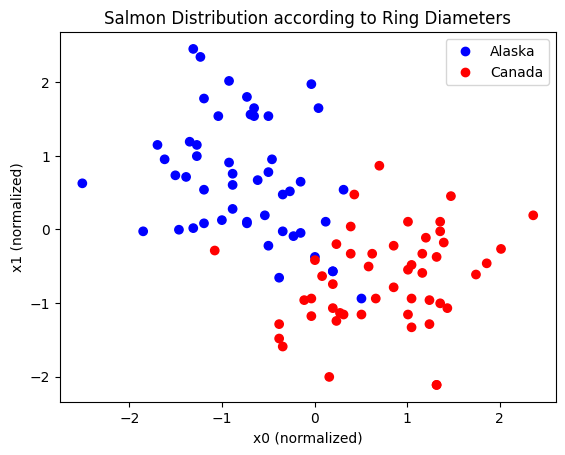

In [8]:
x0 = X.T[0]
x1 = X.T[1]

s = plt.scatter(x0,x1,c=Y,cmap="bwr")
plt.title('Salmon Distribution according to Ring Diameters')
plt.xlabel('x0 (normalized)')
plt.ylabel('x1 (normalized)')

plt.legend(handles=s.legend_elements()[0], labels=['Alaska','Canada'])

(c) Plot of GDA Linear Boundary

In [9]:
mid = mu0*(1-phi) + mu1*phi
slope = -(mu1[1]-mu0[1])/(mu1[0]-mu0[0])
print(mid,slope)

[-5.55111512e-17  3.88578059e-16] 0.9070560709371086


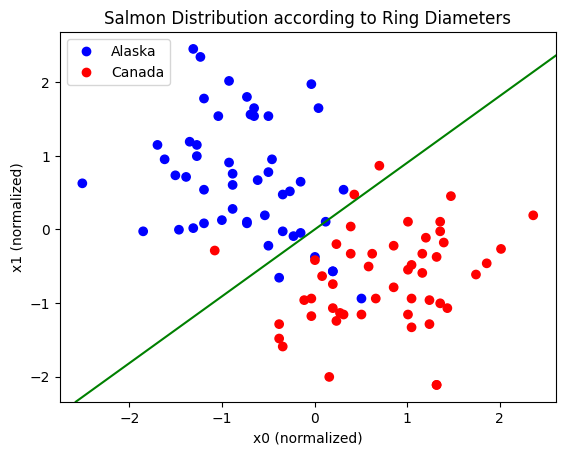

In [10]:
fig, ax = plt.subplots()
ax.scatter(x0,x1,c=Y,cmap="bwr")
plt.title('Salmon Distribution according to Ring Diameters')
plt.xlabel('x0 (normalized)')
plt.ylabel('x1 (normalized)')

plt.axline(mid, slope=slope, color='g')

plt.legend(handles=s.legend_elements()[0], labels=['Alaska','Canada'])

(d) Parameter Estimates for GDA

In [11]:
print("Mean(mu0) of 'Alaska' labels = ", mu0)
print("Mean(mu1) of 'Canada' labels = ", mu1)

Mean(mu0) of 'Alaska' labels =  [-0.75529433  0.68509431]
Mean(mu1) of 'Canada' labels =  [ 0.75529433 -0.68509431]


In [12]:
sigma0 = sigmaParticiple(X,Y,0)
sigma1 = sigmaParticiple(X,Y,1)

print("Covariance matrix(Sigma0) of 'Alaska' labelled datapoints: ")
print(sigma0)

print()

print("Covariance matrix(Sigma1) of 'Canada' labelled datapoints: ")
print(sigma1)

Covariance matrix(Sigma0) of 'Alaska' labelled datapoints: 
[[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]

Covariance matrix(Sigma1) of 'Canada' labelled datapoints: 
[[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


(e) Quadratic Boundary

In [13]:
det_sigma0 = np.linalg.det(sigma0)
det_sigma1 = np.linalg.det(sigma1)

inv_sigma0 = np.linalg.inv(sigma0)
inv_sigma1 = np.linalg.inv(sigma1)

In [14]:
# We find the separation boundary at points where P1 = P2

def plotty(phi,x0_params,x1_params,X):
    p0_term = (X-x0_params[0]).T@x0_params[2]@(X-x0_params[0])
    p1_term = (X-x1_params[0]).T@x1_params[2]@(X-x1_params[0])
    log_term = np.log(x0_params[1]) - np.log(x1_params[1]) + 2*np.log(phi/(1-phi))
    return p0_term - p1_term + log_term

plotty_vec = np.vectorize(plotty, signature="(),(3),(3),(2)->()")

c:\DevTools\Python310\lib\site-packages\numpy\lib\function_base.py:2428: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = tuple(asanyarray(arg) for arg in args)


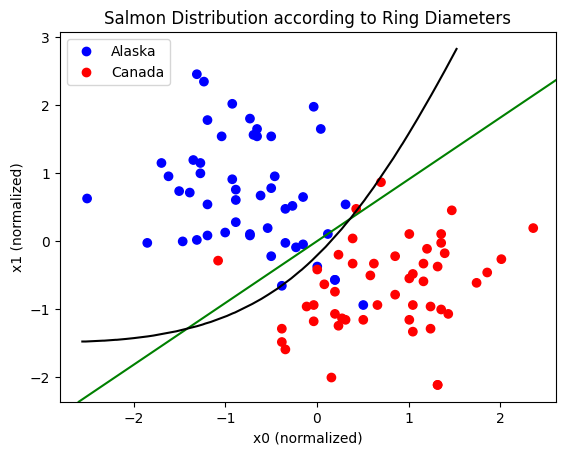

In [15]:
x0_space = np.linspace(-3,2,400)
x1_space = np.linspace(-2,3,400)
x_meshgrid = np.stack(np.meshgrid(x0_space, x1_space),axis=2)


x0_params = [mu0, det_sigma0, inv_sigma0]
x1_params = [mu1, det_sigma1, inv_sigma1]

prob_mesh = plotty_vec(phi,x0_params,x1_params,x_meshgrid)

quad_curve = x_meshgrid[(prob_mesh<0.01)&(prob_mesh>-0.01)].T

ax.plot(quad_curve[0], quad_curve[1], color='black')
ax.figure

(f) Comparison between Linear and Quadratic Boundary

The linear boundary generated from a common Covariance matrix performs fairly well, having 7-8 misclassifications.

Whereas, the quadratic boundary generated from GDA with separate Sigma_i for the labels 'Alaska' and 'Canada', performs marginally better with fewer misclassifications. But, it also requires much more computational time, which may not be justified by performance gains.
 
The quadratic boundary generated is hyperbolic, as can be seen from the plot above.